<h1>Как тестировать<br/>
Machine Learning и Artificial Intelligence?</h1>

<br/>
<br/>

### Игорь Хрол, Минск

<div>
  <div style="float: left; width: 60%;">
      <h1>Кто перед вами?</h1>
      <ul>
    <li>Игорь Хрол</li>
<li>Team Lead / QA Engineer в отделе аналитики Toptal</li>
<li>\>10 лет в отрасли</li>
<li>Инженер, тимлид, менеджер, архитектор, тренер, консультант</li>
<li>Python, Scala, Ruby, Java, SQL и другое</li>
          <li><a>www.khroliz.com</a></li>
                </ul>
  </div>
  <div style="float: left; width: 40%;">
    ![avatar](images/avatar.jpg)
   </div>
</div>




# Где скачать?

[github.com/Khrol/TestML](https://github.com/Khrol/TestML)

  <div style="float: left; width: 50%;">
![QR code](images/repo_qr.jpg)      
  </div>
  <div style="float: left; width: 50%;">
![Star repo](images/star_video.gif)
    </div>

![joke](images/joke.jpg)

In [37]:
42-41

1

<div style="float: left; width: 50%;">
<h1>План</h1>

<h2>I. Research</h2>

<h2>II. Development</h2>

<h2>III. Production</h2>
</div>
  <div style="float: left; width: 50%;">
![Plan](images/plan.png)
    </div>

# Что такое Machine Learning?

<div>
<div style="text-align: center;">
класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, а обучение в процессе применения решений множества сходных задач
</div>
<div style="height: 300px;">
<img src='images/wiki_logo.png' style="max-height: 100%;"/>
    </div>
<div>

![titanic](images/titanic.jpg)

# I. Research

![research](images/research.jpg)

# Что используем?

In [38]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

## Чтение данных

In [39]:
data = pd.read_csv('./data/passengers_info.csv')

In [42]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Создание baseline

![baseline](images/baseline.jpg)

## Создание baseline

In [43]:
features_dataframe = pd.DataFrame()

In [44]:
array, levels = pd.factorize(data.Sex)
features_dataframe['factorized_sex'] = array

In [48]:
features_dataframe['known_age'] = data.Age.notnull().astype(int)
features_dataframe

,factorized_sex,known_age
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
5,0,0
6,0,1
7,0,1
8,1,1
9,1,1


## Обучающие и тестовые выборки

![train_test](images/train_test_data.jpg)

## Обучающие и тестовые выборки

In [49]:
X = features_dataframe
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [50]:
(len(X), len(X_train), len(X_test))

(891, 596, 295)


  <div style="float: left; width: 50%;">
  <h2>Логистическая регрессия</h2>
  <br/>
$$y = f(\vec{w}\cdot\vec{x}) = f\left(\sum_j w_j x_j\right)$$  
</br>
$$f(t)=\frac{1}{1+e^{-t}} $$
</div>
  <div style="float: left; width: 50%;">
![perseptron](images/perceptron.png)
![logistic_curve](images/logistic_curve.png)
</div>



## Линейная регрессия

In [51]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
reg.coef_

array([[2.42375982, 0.40901294]])

# Оценка результата

In [52]:
y_predicted = reg.predict_proba(X_test).T[1]

In [53]:
y_predicted

array([0.15562153, 0.15562153, 0.21718262, 0.6753725 , 0.75797309,
       0.15562153, 0.75797309, 0.75797309, 0.21718262, 0.6753725 ,
       0.21718262, 0.75797309, 0.15562153, 0.75797309, 0.75797309,
       0.75797309, 0.21718262, 0.21718262, 0.21718262, 0.21718262,
       0.21718262, 0.75797309, 0.15562153, 0.15562153, 0.75797309,
       0.75797309, 0.21718262, 0.75797309, 0.75797309, 0.75797309,
       0.21718262, 0.75797309, 0.21718262, 0.15562153, 0.21718262,
       0.21718262, 0.21718262, 0.21718262, 0.21718262, 0.21718262,
       0.21718262, 0.21718262, 0.15562153, 0.21718262, 0.75797309,
       0.15562153, 0.15562153, 0.75797309, 0.21718262, 0.21718262,
       0.15562153, 0.21718262, 0.75797309, 0.21718262, 0.15562153,
       0.21718262, 0.21718262, 0.75797309, 0.21718262, 0.15562153,
       0.21718262, 0.75797309, 0.75797309, 0.15562153, 0.75797309,
       0.21718262, 0.75797309, 0.21718262, 0.75797309, 0.75797309,
       0.75797309, 0.21718262, 0.21718262, 0.15562153, 0.21718

# Оценка результата



  <div style="float: left; width: 60%;">
<h2>Кривая ошибок</h2>
<ol>
    <li>TP (True Positives)</li>
    <li>TN (True Negatives)</li>
    <li>FN (False Negatives)</li>
    <li>FP (False Positives)</li>
</ol>
    $$TPR = \frac{TP}{TP + FN}$$
    <br/>
    $$FPR = \frac{FP}{TN + FP}$$
</div>
  <div style="float: left; width: 40%;">
![roc](images/roc_curves.png)
</div>


# Оценка результата

In [54]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

def init_plt():
    plt.figure(figsize=(14,7))
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    
roc_auc

0.7747747747747749

# Оценка результата

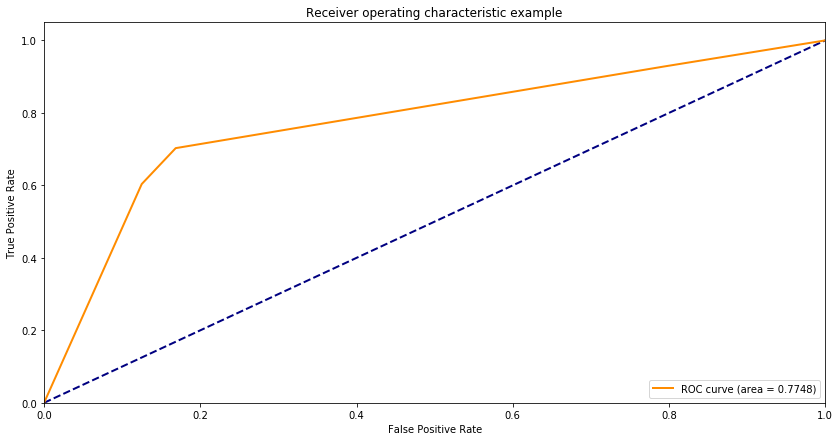

In [55]:
init_plt()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

# Feature engineering: scaling

In [56]:
min_max_scaler = preprocessing.MinMaxScaler()
features_dataframe['scaled_fare'] = min_max_scaler.fit_transform(data[['Fare']])

In [57]:
features_dataframe

,factorized_sex,known_age,scaled_fare
0,0,1,0.014151
1,1,1,0.139136
2,1,1,0.015469
3,1,1,0.103644
4,0,1,0.015713
5,0,0,0.016510
6,0,1,0.101229
7,0,1,0.041136
8,1,1,0.021731
9,1,1,0.058694


# Feature engineering: категориальные признаки

In [58]:
for cl_num in [1, 2]:
    name = 'class{}'.format(cl_num)
    features_dataframe[name] = (data['Pclass'] == cl_num).astype(int)

for sp in [1, 2, 3, 4]:
    name = 'sib_sp_{}'.format(sp)
    features_dataframe[name] = (data.SibSp == sp).astype(int)
    
for emb in ['C', 'Q', 'S']:
    name = 'embarked{}'.format(emb)
    features_dataframe[name] = (data.Embarked == emb).astype(int) 
    
for parch in [0, 1, 2]:
    name = 'parch{}'.format(parch)
    features_dataframe[name] = (data.Parch == parch).astype(int) 
    
for age in [10, 20, 30, 40, 50, 60, 70]:
    name = 'more_{}_years'.format(age)
    features_dataframe[name] = (data['Age'] >= age).astype(int)

In [59]:
features_dataframe

,factorized_sex,known_age,scaled_fare,class1,class2,sib_sp_1,sib_sp_2,sib_sp_3,sib_sp_4,embarkedC,...,parch0,parch1,parch2,more_10_years,more_20_years,more_30_years,more_40_years,more_50_years,more_60_years,more_70_years
0,0,1,0.014151,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
1,1,1,0.139136,1,0,1,0,0,0,1,...,1,0,0,1,1,1,0,0,0,0
2,1,1,0.015469,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,1,1,0.103644,1,0,1,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
4,0,1,0.015713,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
5,0,0,0.016510,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0.101229,1,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,0
7,0,1,0.041136,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1,1,0.021731,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
9,1,1,0.058694,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


# Повторяем на большем числе признаков

In [60]:
X = features_dataframe
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [61]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_predicted = reg.predict_proba(X_test).T[1]

In [63]:
fpr_full, tpr_full, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc_full = metrics.auc(fpr_full, tpr_full)
roc_auc_full

0.8504455542499021

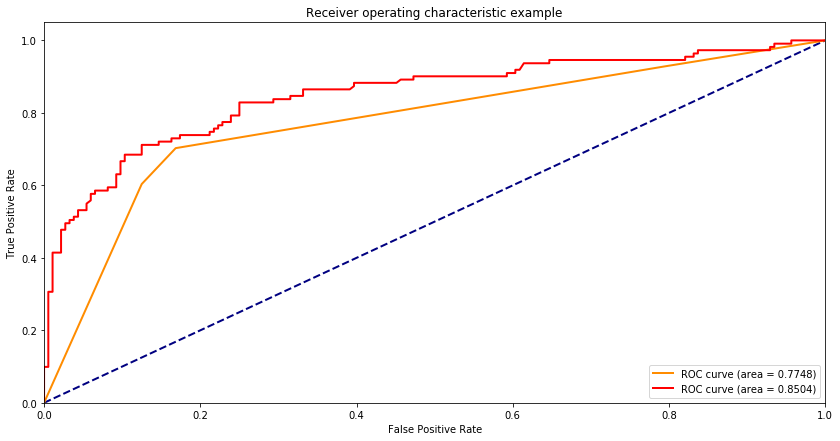

In [64]:
init_plt()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr_full, tpr_full, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_full)
plt.legend(loc="lower right")
plt.show()

# Больше не значит лучше

In [65]:
sorted_features = list(sorted(zip(features_dataframe.columns, reg.coef_[0]),
                              key=lambda x: -abs(x[1])))
sorted_features

[('factorized_sex', 2.4375721833460346),
 ('class1', 1.7592090543628813),
 ('sib_sp_4', -1.403916660678414),
 ('known_age', 1.3984060360823978),
 ('sib_sp_3', -1.2235843197476801),
 ('more_10_years', -1.1457842420672368),
 ('embarkedS', -0.9556897592006888),
 ('class2', 0.9219407973408659),
 ('more_40_years', -0.5208472403956959),
 ('parch2', -0.4514919188433413),
 ('more_60_years', -0.4507455243902598),
 ('embarkedQ', -0.4143939883688164),
 ('scaled_fare', 0.4118150908799796),
 ('more_50_years', -0.3734415952831889),
 ('embarkedC', -0.3021715752632573),
 ('sib_sp_1', 0.29520250992020025),
 ('parch1', 0.2736972925037904),
 ('sib_sp_2', -0.20479338140558742),
 ('more_20_years', -0.13887045263444842),
 ('parch0', 0.1340150270377765),
 ('more_70_years', 0.06147228555222868),
 ('more_30_years', 0.03429156186357496)]

# Пересматриваем модель на 10-ми признаках

In [66]:
features_part = list(map(lambda x: x[0], sorted_features[:10]))
features_part

['factorized_sex',
 'class1',
 'sib_sp_4',
 'known_age',
 'sib_sp_3',
 'more_10_years',
 'embarkedS',
 'class2',
 'more_40_years',
 'parch2']

In [67]:
X = features_dataframe[features_part]
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [68]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)

reg.coef_

array([[ 2.46716235,  1.81454976, -1.45590019,  1.46795502, -1.20276766,
        -1.27496616, -0.63724575,  0.94126472, -0.72116416, -0.55319525]])

# Пересматриваем модель на 10-ми признаках

In [69]:
y_predicted = reg.predict_proba(X_test).T[1]

In [70]:
fpr_part, tpr_part, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc_part = metrics.auc(fpr_part, tpr_part)
roc_auc_part

0.8539463376419897

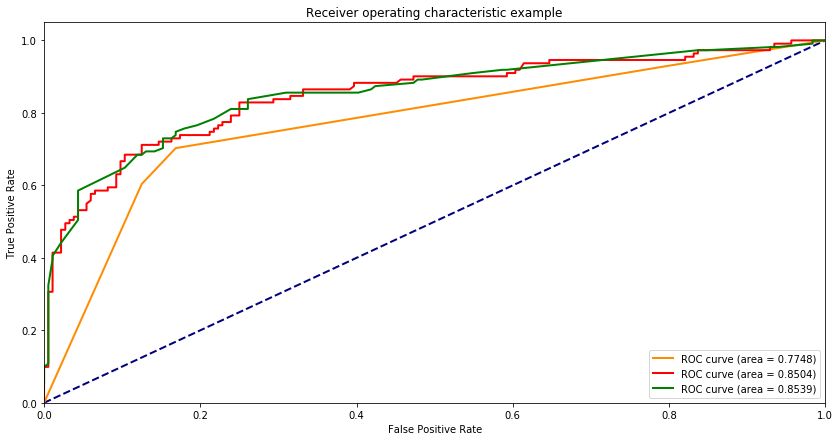

In [71]:
init_plt()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr_full, tpr_full, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_full)
plt.plot(fpr_part, tpr_part, color='green', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_part)
plt.legend(loc="lower right")
plt.show()

# Выбор threshold

In [72]:
fpr_part, tpr_part, thresholds

(array([0.        , 0.        , 0.        , 0.00543478, 0.00543478,
        0.00543478, 0.00543478, 0.00543478, 0.00543478, 0.00543478,
        0.01086957, 0.01086957, 0.02173913, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.10326087, 0.11956522, 0.125     ,
        0.13043478, 0.14130435, 0.15217391, 0.15217391, 0.15217391,
        0.16304348, 0.16847826, 0.16847826, 0.17934783, 0.19565217,
        0.2173913 , 0.23913043, 0.25543478, 0.26086957, 0.26086957,
        0.30978261, 0.31521739, 0.40217391, 0.41847826, 0.42391304,
        0.47282609, 0.47826087, 0.48369565, 0.54891304, 0.58695652,
        0.5923913 , 0.83695652, 0.84782609, 0.93478261, 0.94021739,
        0.98369565, 0.98369565, 0.99456522, 1.        ]),
 array([0.05405405, 0.07207207, 0.0990991 , 0.10810811, 0.12612613,
        0.17117117, 0.23423423, 0.25225225, 0.28828829, 0.32432432,
        0.3963964 , 0.40540541, 0.44144144, 0.5045045 , 0.52252252,
        0.57657658, 0.58558559, 0.64864865, 0.68468468, 0.

# Выбор threshold

In [73]:
for i in range(1, len(fpr_part)):
    if fpr_part[i - 1] < 1 - tpr_part[i - 1] and fpr_part[i] > 1 - tpr_part[i]:
        print(thresholds[i - 1], thresholds[i])
        break

0.41777249836282404 0.4140394787350148


# II. Development

![development](images/development.jpg)

# Сохраняем модель

In [74]:
joblib.dump(reg, 'model.pkl')

['model.pkl']

![demo](images/demo.png)

# Сравниваем с Research

In [75]:
import requests
import json

all_predicted_y = reg.predict_proba(X).T[1]
EPS = 0.000001

def test_record(record):
    id = record['PassengerId']
    actual_result = requests.post('http://localhost:5000/classify',
                    headers={'Content-Type': 'application/json'}, 
                    data=json.dumps({'sex': record['Sex'], 'sib_sp': record['SibSp'], 'age': record['Age'],
                                   'ticket_class': record['Pclass'], 'parch': record['Parch'], 
                                   'embarked': record['Embarked']}))
    actual_score = actual_result.json()['score']
    expected_score = all_predicted_y[id - 1]
    print(record['PassengerId'], expected_score, actual_score)
    assert abs(expected_score - actual_score) < EPS

data.sample(10).apply(test_record, axis=1)

136 0.37767887066588873 0.37767887066587075
883 0.5960997118725747 0.5960997118725492
449 0.9089972072981134 0.9089972072981066
255 0.29211801848000596 0.2921180184799823
390 0.8773692774523377 0.8773692774523274
841 0.11126123564487547 0.11126123564486701
886 0.7362340018241824 0.7362340018241665
797 0.8149688212187849 0.8149688212187648
553 0.16332883799302572 0.16332883799302447
547 0.7909240962142374 0.7909240962142174


135    None
882    None
448    None
254    None
389    None
840    None
885    None
796    None
552    None
546    None
dtype: object

# III. Production

![production](images/production.jpg)

<div style="float: left; width: 60%;">
<h1>Воспроизводимость<br/> логов</h1>

</div>
  <div style="float: left; width: 40%; height: 600px;">
  <img src='images/repeat_logs.jpg' style="max-height: 100%;"/>
    </div>

# Устаревание модели

![ships](images/ships.png)

# Другие материалы

- [www.youtube.com/watch?v=T_YWBGApUgs&t=21524s](https://www.youtube.com/watch?v=T_YWBGApUgs&t=21524s)
- [www.eecs.tufts.edu/~dsculley/papers/ml_test_score.pdf](https://www.eecs.tufts.edu/~dsculley/papers/ml_test_score.pdf)
- [kaggle.com](http://kaggle.com/)
- [ods.ai](http://ods.ai/)

<div style="float: left; width: 70%;">
<h1>Спасибо за внимание!<br/>Вопросы?<br/></h1>
<h2>Игорь Хрол</h2>
<h2>[khroliz@gmail.com](khroliz@gmail.com)</h2>
<h2>[github.com/Khrol/TestML](https://github.com/Khrol/TestML)</h2>

</div>
  <div style="float: left; width: 30%; height: 600px;">
  <img src='images/question.png' style="max-height: 100%;"/>
    </div>